In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


1. Data Preparation:

○ Access the StatsBomb Open Data repository..
○ Locate the FA Women's Super League dataset using competitions.json.
○ Extract player-level data from events/<match_id>.json and aggregate it into a dataset of
performance metrics relevant for scouting.

2. Talent Scouting Analysis or Modeling:

○ Develop a model or analysis to identify high-potential players for recruitment. Be
creative in your approach, choosing metrics and methods that align with scouting goals. If
modeling, split data into training and testing sets and evaluate with a suitable metric.
Deliver clear, actionable insights for recommending players.

3. Submission: Submit a Jupyter notebook as PDF or HTML (how to linked below) and relevant
source code files containing:

○ Code to load and process the StatsBomb FA Women's Super League data into a
player-level dataset for scouting.

○ Your model or analysis, including visualizations or results that identify high-potential
players.

○ A brief explanation (100–200 words) addressing:

■ What player performance metrics did you choose, and why are they relevant for
scouting talent?

■ What insights did your model or analysis reveal about potential players for
recruitment?

■ What are the limitations of your approach?

4. Tools:

○ Use Python with libraries like pandas, scikit-learn, matplotlib, or seaborn.


In [2]:
df_18 = pd.read_parquet('/Users/amitmishra/wsl_data/data/df_18.parquet')

In [3]:
df_18.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,counterpress,dribble_nutmeg,dribble_outcome,...,shot_saved_off_target,goalkeeper_shot_saved_to_post,shot_saved_to_post,goalkeeper_lost_in_play,goalkeeper_success_out,shot_follows_dribble,goalkeeper_success_in_play,half_start_late_video_start,half_end_early_video_end,goalkeeper_saved_to_post
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
attacking_positions = [
    'Center Forward',
    'Left Center Forward', 
    'Right Center Forward',
    'Secondary Striker'
]

In [5]:
df_18 = df_18[(df_18['position'].isin(attacking_positions))]

In [6]:
# Aggregation step; adding KPIs to scout a striker

stats_18 = df_18.groupby(['player_id', 'player']).agg({
    'match_id': 'nunique', 
    'team': 'first',
    'shot_statsbomb_xg': 'sum',
    'shot_one_on_one': lambda x: (x == True).sum(),     # one-v-one situation (for strikers making off the ball runs, movement)
    'pass_through_ball': lambda x: (x == True).sum(),   # for through passess (progression capability)
    'pass_goal_assist': lambda x: (x == True).sum(),    # for assists
    'shot_outcome': lambda x: (x == 'Goal').sum(),      # for counting goals scored by each player
    'pass_shot_assist': lambda x: (x == True).sum(),    # for key passes (Link-up play)
    'counterpress':lambda x: (x==True).sum(),           # if the striker pressed (differentiator)
    'duel_outcome': lambda x: (x == 'Won').sum(),       # physical battles won (differentiator)
    'dribble_outcome': lambda x: (x=='Complete').sum()
})

In [7]:
stats_18 = stats_18.rename(columns={'shot_outcome': 'goals',
                   'shot_statsbomb_xg':'xG', 
                   'match_id':'mtchs_pld',
                   'duel_outcome':'duels_won',
                   'pass_through_ball':'through_balls',
                   'pass_goal_assist':'assists',
                   'dribble_outcome':'completed_dribbles',
                   'pass_shot_assist':'key_passes',
                   'shot_one_on_one':'1vs1'})

In [8]:
stats_18 = stats_18.reset_index()

In [9]:
stats_18.describe()

,player_id,mtchs_pld,xG,1vs1,through_balls,assists,goals,key_passes,counterpress,duels_won,completed_dribbles
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,15576.471264,4.850575,1.219724,0.954023,0.770115,0.482759,1.160920,3.367816,19.931034,1.229885,4.597701
std,5071.896833,4.525198,2.682826,2.256299,1.582617,1.354253,3.007253,4.856343,26.227446,1.998262,6.784832
min,4638.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15554.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,15708.000000,3.000000,0.217012,0.000000,0.000000,0.000000,0.000000,2.000000,10.000000,0.000000,2.000000
75%,18205.000000,6.500000,1.164404,1.000000,1.000000,0.000000,1.000000,5.000000,26.000000,1.500000,5.000000
max,24747.000000,20.000000,17.526108,13.000000,7.000000,10.000000,21.000000,26.000000,130.000000,11.000000,39.000000


In [10]:
# filger out players who've played more than 3 games

stats_18 = stats_18[stats_18['mtchs_pld'] > 3]

In [11]:
stats_18.head()

,player_id,player,mtchs_pld,team,xG,1vs1,through_balls,assists,goals,key_passes,counterpress,duels_won,completed_dribbles
1,4641.0,Francesca Kirby,12,Chelsea FCW,5.925652,2,1,0,4,21,36,1,17
2,4643.0,Georgia Stanway,4,Manchester City WFC,1.533888,1,0,0,1,3,17,1,11
4,4650.0,Nadia Nadim,4,Manchester City WFC,1.219117,0,0,0,0,3,22,0,5
5,4653.0,Jane Ross,19,West Ham United LFC,6.622918,4,7,2,6,15,104,5,22
6,4654.0,Nikita Parris,15,Manchester City WFC,14.235290,13,4,5,14,12,123,4,25


#### Checking for correlation after selecting features. We'll drop features that are highly correlated to get more accurate results

In [30]:
# Initial columns selected below

metric_cols = ['goals', 'xG' ,'1vs1','through_balls','assists'	,'key_passes','counterpress','duels_won','completed_dribbles']

In [31]:
correlation_matrix = stats_18[metric_cols].corr()
correlation_matrix

,goals,xG,1vs1,through_balls,assists,key_passes,counterpress,duels_won,completed_dribbles
goals,1.000000,0.969185,0.824928,0.584495,0.807564,0.720134,0.809445,0.267525,0.732347
xG,0.969185,1.000000,0.879834,0.596720,0.779807,0.751183,0.860011,0.343455,0.773162
1vs1,0.824928,0.879834,1.000000,0.574822,0.680844,0.657361,0.804448,0.360379,0.707984
through_balls,0.584495,0.596720,0.574822,1.000000,0.601172,0.614813,0.643104,0.313910,0.574814
assists,0.807564,0.779807,0.680844,0.601172,1.000000,0.616481,0.652408,0.245815,0.731099
key_passes,0.720134,0.751183,0.657361,0.614813,0.616481,1.000000,0.700804,0.288563,0.806906
counterpress,0.809445,0.860011,0.804448,0.643104,0.652408,0.700804,1.000000,0.565658,0.832533
duels_won,0.267525,0.343455,0.360379,0.313910,0.245815,0.288563,0.565658,1.000000,0.484301
completed_dribbles,0.732347,0.773162,0.707984,0.574814,0.731099,0.806906,0.832533,0.484301,1.000000


#### Based on the correlation matrix, we will drop xG since it is highly correlated to goals. We will instead include finishing efficiency that calculates: Goals - xG

In [32]:
# Calculate new metric finishing_efficiency

stats_18['finishing_efficiency'] = stats_18['goals'] - stats_18['xG']

In [33]:
metric_cols_new = ['goals','1vs1','through_balls','assists'	,'key_passes','duels_won','completed_dribbles','finishing_efficiency']

In [34]:
correlation_matrix_new = stats_18[metric_cols_new].corr()
correlation_matrix_new

,goals,1vs1,through_balls,assists,key_passes,duels_won,completed_dribbles,finishing_efficiency
goals,1.000000,0.824928,0.584495,0.807564,0.720134,0.267525,0.732347,0.592939
1vs1,0.824928,1.000000,0.574822,0.680844,0.657361,0.360379,0.707984,0.226552
through_balls,0.584495,0.574822,1.000000,0.601172,0.614813,0.313910,0.574814,0.247730
assists,0.807564,0.680844,0.601172,1.000000,0.616481,0.245815,0.731099,0.488226
key_passes,0.720134,0.657361,0.614813,0.616481,1.000000,0.288563,0.806906,0.252957
duels_won,0.267525,0.360379,0.313910,0.245815,0.288563,1.000000,0.484301,-0.116533
completed_dribbles,0.732347,0.707984,0.574814,0.731099,0.806906,0.484301,1.000000,0.227045
finishing_efficiency,0.592939,0.226552,0.247730,0.488226,0.252957,-0.116533,0.227045,1.000000


In [37]:
# final features used in clustering

final_features = ['goals','1vs1','through_balls','assists','key_passes','duels_won','completed_dribbles','finishing_efficiency']

In [38]:
# Convert everything to per-game rates

numeric_cols = stats_18.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop('mtchs_pld')

for col in numeric_cols:
    stats_18[f'{col}_per90'] = stats_18[col] / stats_18['mtchs_pld']


In [40]:
clustering_cols = ['goals_per90', '1vs1_per90', 'through_balls_per90', 'assists_per90', 
                 'key_passes_per90', 'duels_won_per90', 'completed_dribbles_per90', 
                 'finishing_efficiency']

clustering_data = stats_18[clustering_cols]

### Clustering

In [71]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Run KMeans clustering

kmeans = KMeans(n_clusters=2, random_state=42)
stats_18['cluster'] = kmeans.fit_predict(scaled_data)



In [72]:
# check cluster distribution

print('')

print(f'{stats_18['cluster'].value_counts()}')


cluster
0    29
1    12
Name: count, dtype: int64


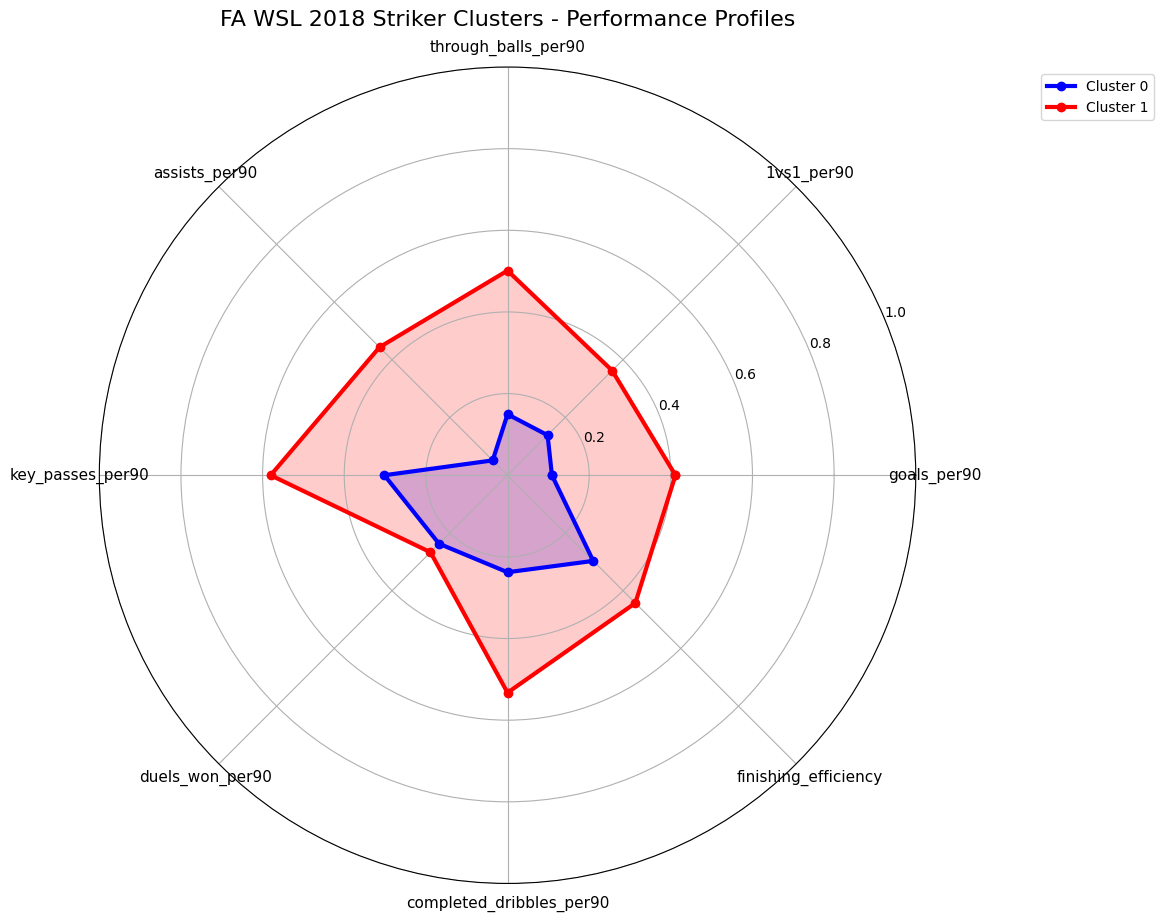


Cluster Characteristics (for naming):

Cluster 0:
Strongest areas: {'completed_dribbles_per90': 0.7129282454079614, 'key_passes_per90': 0.527944992803005, 'duels_won_per90': 0.2768822286570765}

Cluster 1:
Strongest areas: {'completed_dribbles_per90': 1.5980581796371272, 'key_passes_per90': 1.0154689608636978, 'finishing_efficiency': 0.4416382130083332}


In [73]:
# Calculate cluster means
cluster_means = stats_18.groupby('cluster')[clustering_cols].mean()

# Get ranges for scaling (min/max for each metric)
ranges = [(stats_18[col].min(), stats_18[col].max()) for col in clustering_cols]

def create_striker_radar(cluster_means, variables, ranges):
    # Calculate angles for each variable
    angles = np.linspace(0, 2*np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    
    # Colors and labels
    colors = ['blue', 'red']
    cluster_labels = ['Cluster 0', 'Cluster 1']  # You'll rename these based on analysis
    
    # Plot each cluster
    for i, cluster_id in enumerate([0, 1]):
        values = cluster_means.loc[cluster_id].values.tolist()
        
        # Scale values between 0 and 1 for better visualization
        scaled_values = [(val - ranges[j][0]) / (ranges[j][1] - ranges[j][0]) 
                        for j, val in enumerate(values)]
        scaled_values += scaled_values[:1]  # Close the loop
        
        ax.plot(angles, scaled_values, 'o-', linewidth=3, label=cluster_labels[i], color=colors[i])
        ax.fill(angles, scaled_values, alpha=0.2, color=colors[i])
    
    # Customize
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables, size=11)
    ax.set_ylim(0, 1)
    ax.set_title('FA WSL 2018 Striker Clusters - Performance Profiles', size=16, pad=30)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    return fig, ax

# Create the improved radar plot
fig, ax = create_striker_radar(cluster_means, clustering_cols, ranges)
plt.tight_layout()
plt.show()

# Print cluster characteristics for naming
print("\nCluster Characteristics (for naming):")
for cluster_id in [0, 1]:
    print(f"\nCluster {cluster_id}:")
    cluster_data = cluster_means.loc[cluster_id]
    # Show which metrics are highest for this cluster
    top_metrics = cluster_data.nlargest(3)
    print("Strongest areas:", top_metrics.to_dict())

In [74]:
# Assign cluster = 1 to elite strikers
elite_strikers = stats_18[stats_18['cluster'] == 1]

# Only select the key performance metrics for the heatmap
'''key_metrics = ['goals_per90', 'xG_per90', 'assists_per90', 'key_passes_per90', 
               'completed_dribbles_per90', 'duels_won_per90', 'counterpress_per90']'''

key_metrics = ['goals_per90', '1vs1_per90', 'through_balls_per90', 'assists_per90', 
                 'key_passes_per90', 'duels_won_per90', 'completed_dribbles_per90', 
                 'finishing_efficiency']

# Get only the percentile columns for key metrics
percentile_cols = [f'{col}_percentile' for col in key_metrics]

# Create heatmap
plt.figure(figsize=(14, 10))
heatmap_data = elite_strikers.set_index('player')[percentile_cols]

sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=50, 
            fmt='.0f', cbar_kws={'label': 'Percentile Rank'})
plt.title('Elite Strikers - Performance Percentile Rankings')
plt.tight_layout()
plt.show()

KeyError: "['finishing_efficiency_percentile'] not in index"

<Figure size 1400x1000 with 0 Axes>

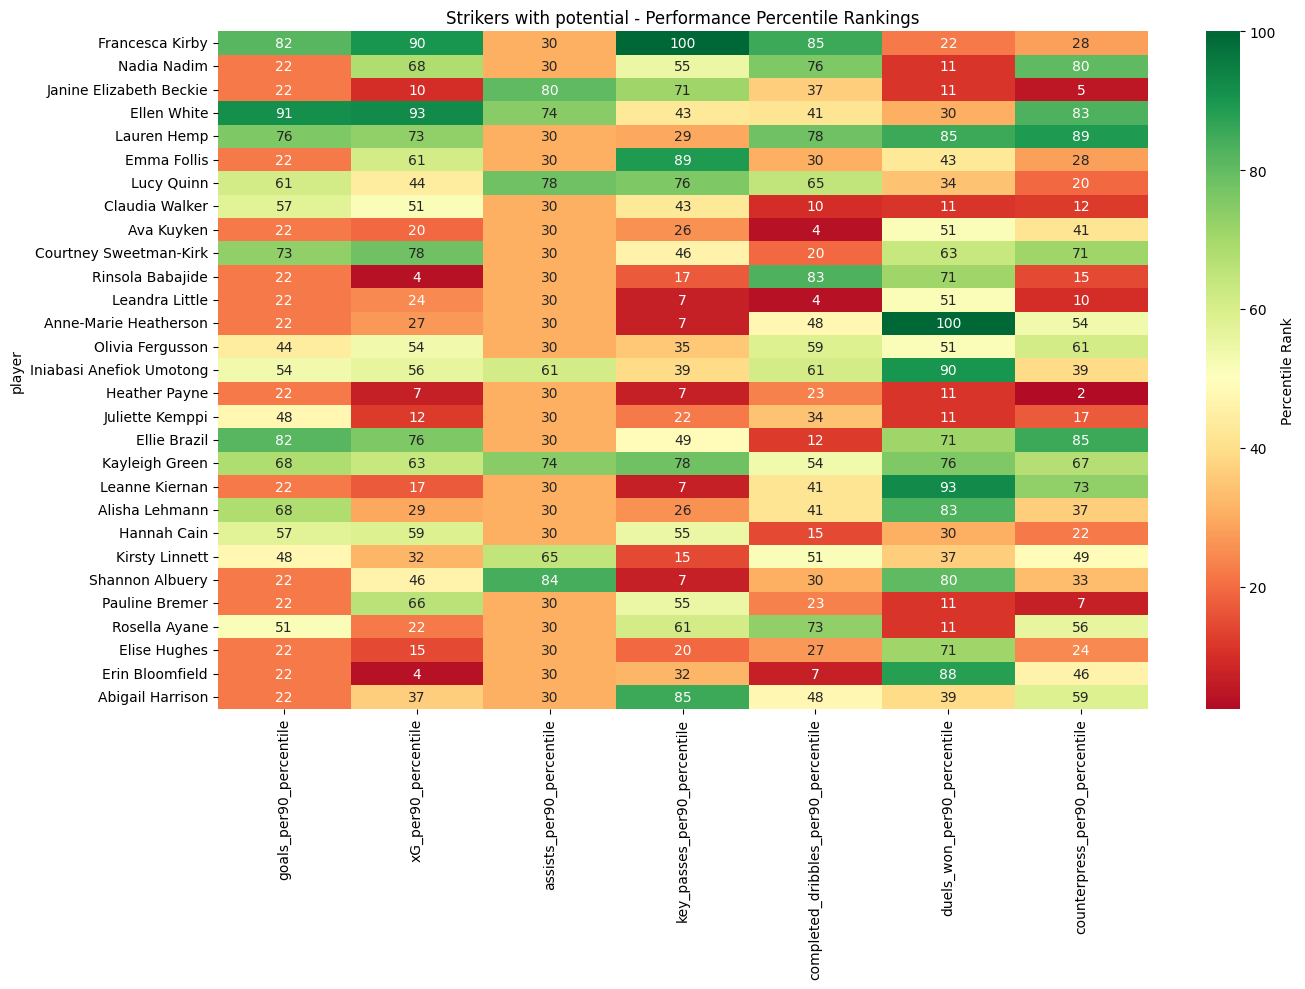

In [75]:
# Assign cluster = 1 to elite strikers
high_potential = stats_18[stats_18['cluster'] == 0]

# Only select the key performance metrics for the heatmap
key_metrics = ['goals_per90', 'xG_per90', 'assists_per90', 'key_passes_per90', 
               'completed_dribbles_per90', 'duels_won_per90', 'counterpress_per90']

# Get only the percentile columns for key metrics
percentile_cols = [f'{col}_percentile' for col in key_metrics]

# Create heatmap
plt.figure(figsize=(14, 10))
heatmap_data = high_potential.set_index('player')[percentile_cols]

sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=50, 
            fmt='.0f', cbar_kws={'label': 'Percentile Rank'})
plt.title('Strikers with potential - Performance Percentile Rankings')
plt.tight_layout()
plt.show()

In [57]:
high_potential = stats_18[stats_18['cluster'] == 0].drop(columns=['xG', '1vs1',
       'through_balls', 'assists', 'goals', 'key_passes', 'counterpress',
       'duels_won', 'completed_dribbles'])

In [58]:
high_potential.head()

,player_id,player,mtchs_pld,team,finishing_efficiency,player_id_per90,xG_per90,1vs1_per90,through_balls_per90,assists_per90,...,cluster,goals_per90_percentile,xG_per90_percentile,assists_per90_percentile,key_passes_per90_percentile,through_balls_per90_percentile,1vs1_per90_percentile,completed_dribbles_per90_percentile,duels_won_per90_percentile,counterpress_per90_percentile
1,4641.0,Francesca Kirby,12,Chelsea FCW,-1.925652,386.750000,0.493804,0.166667,0.083333,0.000000,...,0,81.707317,90.243902,30.487805,100.000000,53.658537,56.097561,85.365854,21.951220,28.048780
4,4650.0,Nadia Nadim,4,Manchester City WFC,-1.219117,1162.500000,0.304779,0.000000,0.000000,0.000000,...,0,21.951220,68.292683,30.487805,54.878049,24.390244,23.170732,75.609756,10.975610,80.487805
9,4992.0,Janine Elizabeth Beckie,6,Manchester City WFC,-0.144827,832.000000,0.024138,0.000000,0.000000,0.166667,...,0,21.951220,9.756098,80.487805,70.731707,24.390244,23.170732,36.585366,10.975610,4.878049
12,10180.0,Ellen White,8,Birmingham City WFC,1.711389,1272.500000,0.536076,0.000000,0.000000,0.125000,...,0,91.463415,92.682927,74.390244,42.682927,24.390244,23.170732,41.463415,30.487805,82.926829
22,15555.0,Lauren Hemp,7,Manchester City WFC,-0.229119,2222.142857,0.318446,0.285714,0.000000,0.000000,...,0,75.609756,73.170732,30.487805,29.268293,24.390244,82.926829,78.048780,85.365854,89.024390


In [59]:
# show top performers in each category
print("Top Performers in Each Category (within Elite Strikers):")
print("="*60)

metrics_display = {
    'xG_per90': 'Expected Goals',
    'goals_per90': 'Goals Scored', 
    'assists_per90': 'Assists',
    'key_passes_per90': 'Key Passes',
    'completed_dribbles_per90': 'Dribbles'
}

for metric, display_name in metrics_display.items():
    top_3 = elite_strikers.nlargest(3, metric)[['player', 'team', metric]]
    print(f"\n{display_name}:")
    for idx, player in top_3.iterrows():
        print(f"  {player['player']:25} ({player['team']:15}) - {player[metric]:.2f}")

Top Performers in Each Category (within Elite Strikers):

Expected Goals:
  Nikita Parris             (Manchester City WFC) - 0.95
  Vivianne Miedema          (Arsenal WFC    ) - 0.88
  Bethany England           (Chelsea FCW    ) - 0.62

Goals Scored:
  Vivianne Miedema          (Arsenal WFC    ) - 1.05
  Nikita Parris             (Manchester City WFC) - 0.93
  Bethany England           (Chelsea FCW    ) - 0.90

Assists:
  Ramona Bachmann           (Chelsea FCW    ) - 0.60
  Fara Williams             (Reading WFC    ) - 0.50
  Vivianne Miedema          (Arsenal WFC    ) - 0.50

Key Passes:
  Gemma Suzanne Davison     (Reading WFC    ) - 1.70
  Fara Williams             (Reading WFC    ) - 1.50
  Vivianne Miedema          (Arsenal WFC    ) - 1.30

Dribbles:
  Ramona Bachmann           (Chelsea FCW    ) - 3.00
  Georgia Stanway           (Manchester City WFC) - 2.75
  Gemma Suzanne Davison     (Reading WFC    ) - 2.00


In [60]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import numpy as np

def create_individual_pizza_charts(stats_18, cluster_id, max_players=8):
    """Create individual pizza charts for players in a specific cluster"""
    
    # Parameters for strikers
    params = [
        "Goals\nper 90", "xG\nper 90", "Assists\nper 90", "Key Passes\nper 90",
        "Through Balls\nper 90", "1v1s\nper 90", "Completed\nDribbles per 90",
        "Duels Won\nper 90", "Counterpress\nper 90"
    ]
    
    metric_cols = [
        'goals_per90', 'xG_per90', 'assists_per90', 'key_passes_per90',
        'through_balls_per90', '1vs1_per90', 'completed_dribbles_per90',
        'duels_won_per90', 'counterpress_per90'
    ]
    
    # Color scheme
    slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 4 + ["#D70232"] * 2
    text_colors = ["#F2F2F2"] * 9
    
    # Calculate percentiles
    for col in metric_cols:
        stats_18[f'{col}_percentile'] = stats_18[col].rank(pct=True) * 100
    
    # Get players from specified cluster
    cluster_players = stats_18[stats_18['cluster'] == cluster_id].head(max_players)
    
    print(f"Creating pizza charts for Cluster {cluster_id} ({len(cluster_players)} players)")
    
    # Create individual charts
    for idx, (_, player) in enumerate(cluster_players.iterrows()):
        
        # Get percentile values
        values = [player[f'{metric}_percentile'] for metric in metric_cols]
        
        # Create pizza chart
        baker = PyPizza(
            params=params,
            background_color="#222222",
            straight_line_color="#000000",
            straight_line_lw=1,
            last_circle_color="#000000",
            last_circle_lw=1,
            other_circle_lw=0,
            inner_circle_size=20
        )
        
        # Plot pizza
        fig, ax = baker.make_pizza(
            values,
            figsize=(10, 10),
            color_blank_space="same",
            slice_colors=slice_colors,
            value_colors=text_colors,
            value_bck_colors=slice_colors,
            blank_alpha=0.4,
            kwargs_slices=dict(edgecolor="#000000", zorder=2, linewidth=1),
            kwargs_params=dict(color="#F2F2F2", fontsize=11, va="center"),
            kwargs_values=dict(
                color="#000000", fontsize=10, zorder=3,
                bbox=dict(edgecolor="#000000", facecolor="white", boxstyle="round,pad=0.2", lw=1)
            )
        )
        
        # Add title
        fig.text(0.515, 0.975, f"{player['player']} - {player['team']}", 
                size=16, ha="center", weight='bold', color="#F2F2F2")
        
        # Add subtitle
        fig.text(0.515, 0.955, f"Cluster {cluster_id} - Percentile Rank vs All Strikers", 
                size=13, ha="center", color="#F2F2F2")
        
        # Add category labels
        fig.text(0.34, 0.93, "Attacking        Creative        Physical", 
                size=14, weight='bold', color="#F2F2F2")
        
        # Add colored rectangles for legend
        fig.patches.extend([
            plt.Rectangle((0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf", transform=fig.transFigure),
            plt.Rectangle((0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300", transform=fig.transFigure),
            plt.Rectangle((0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232", transform=fig.transFigure)
        ])
        
        plt.show()

Creating pizza charts for Cluster 0 (3 players)


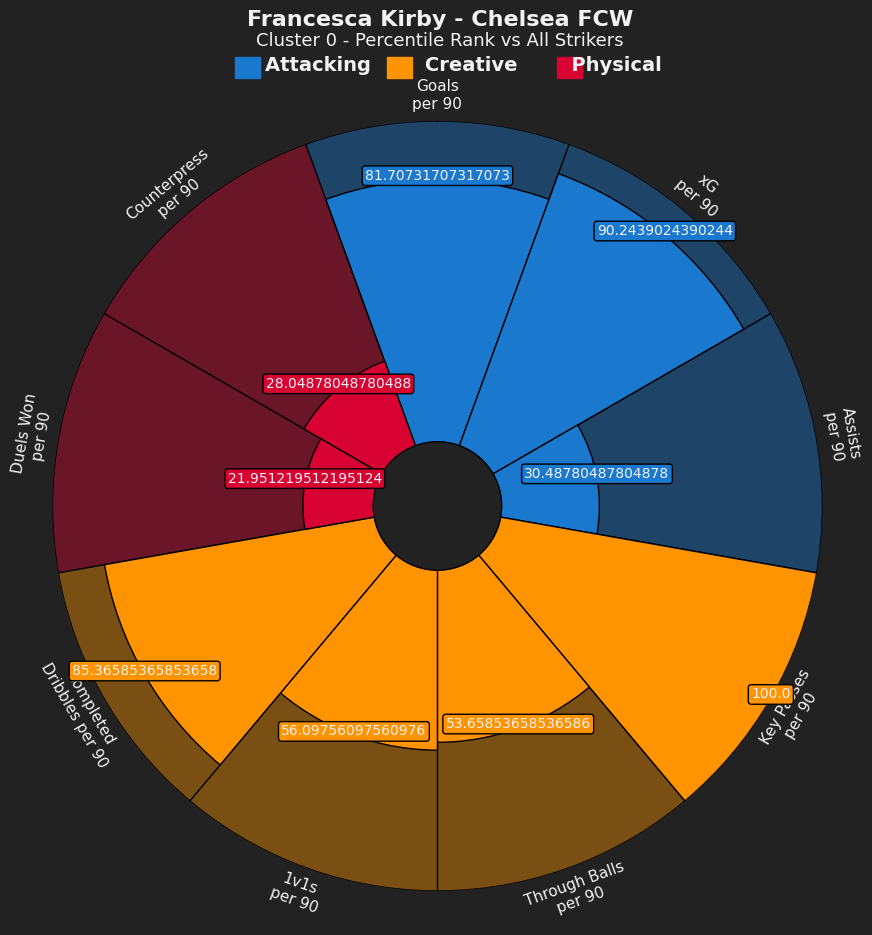

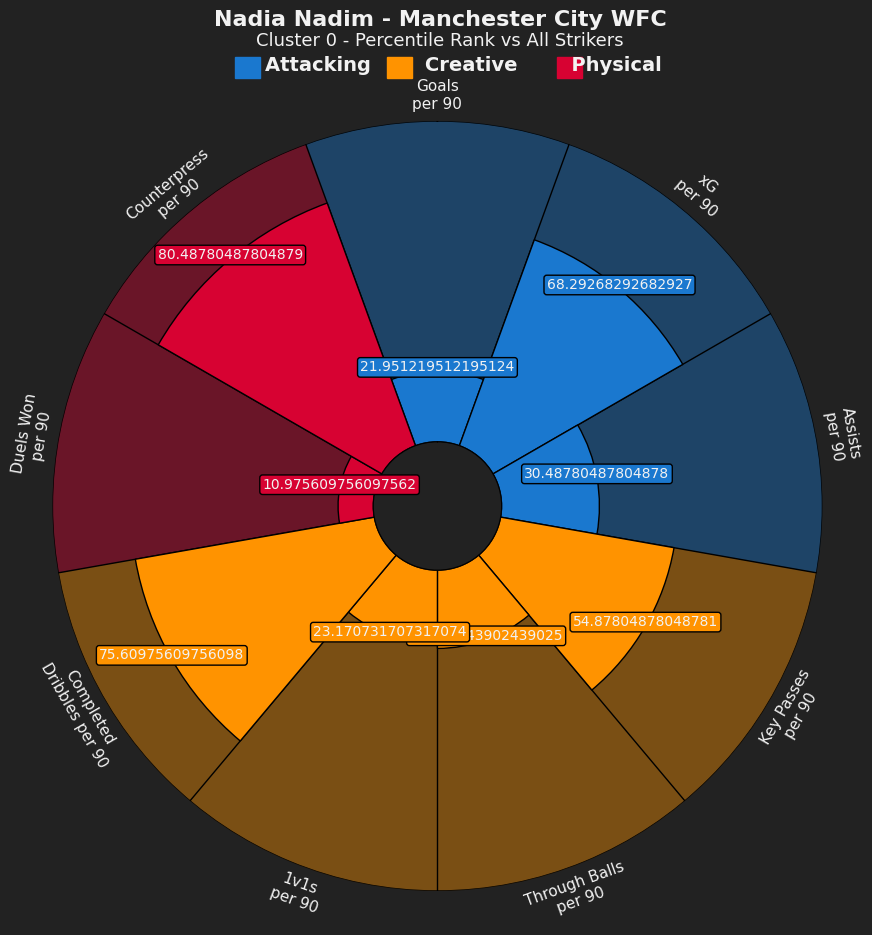

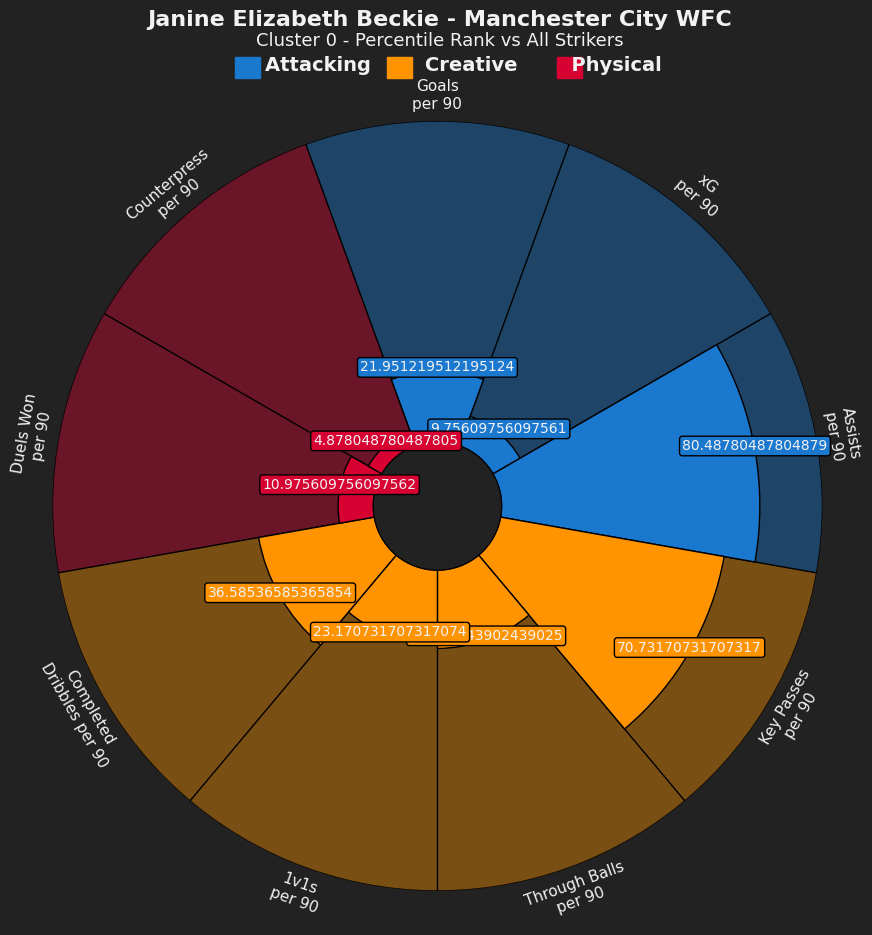

In [61]:
# Create charts for both clusters
create_individual_pizza_charts(stats_18, cluster_id=0, max_players=3)


## Players from Cluster 1 (Elite strikers)

Creating pizza charts for Cluster 1 (3 players)


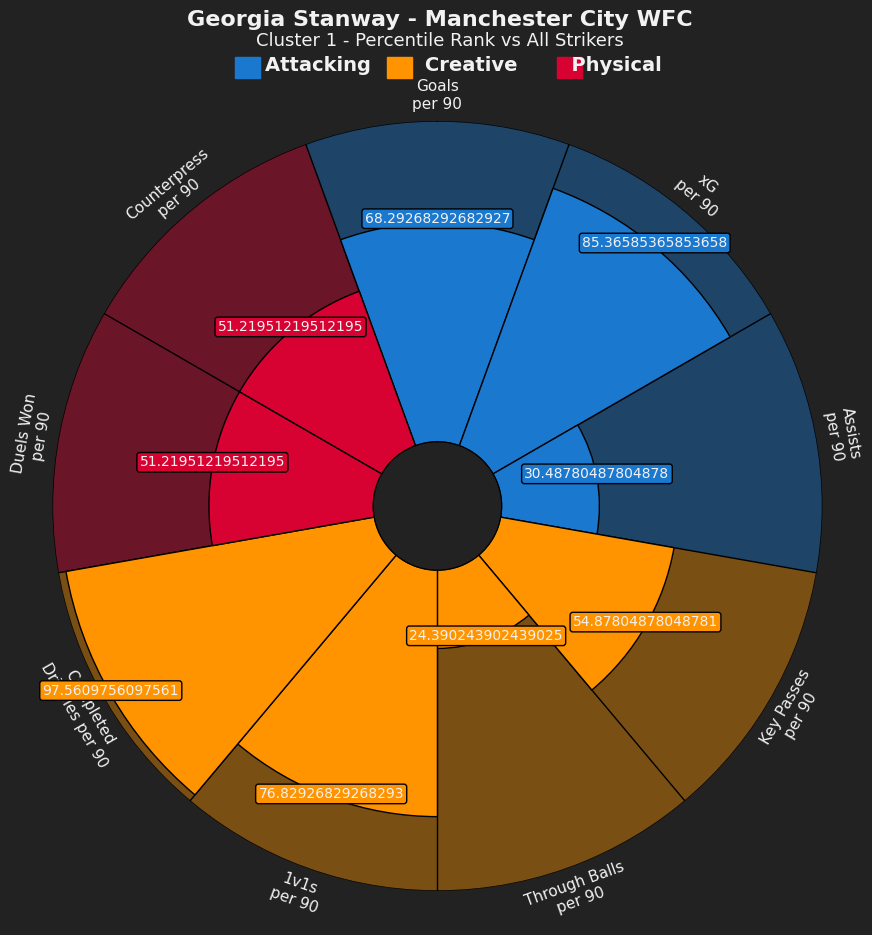

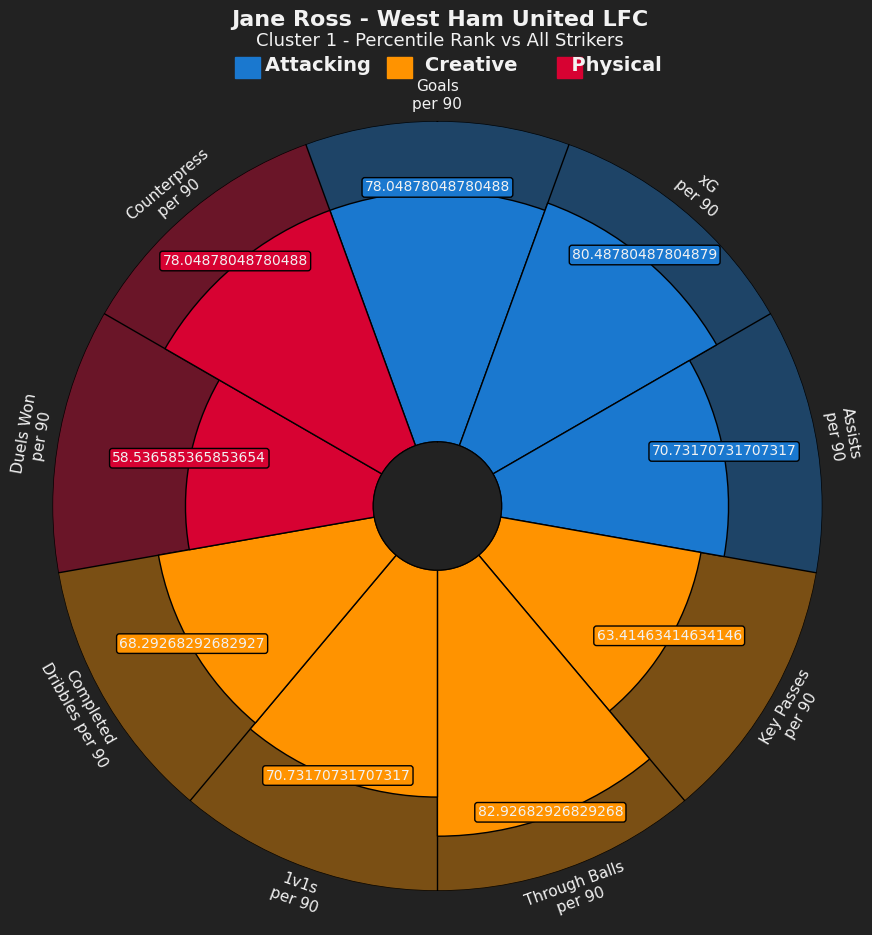

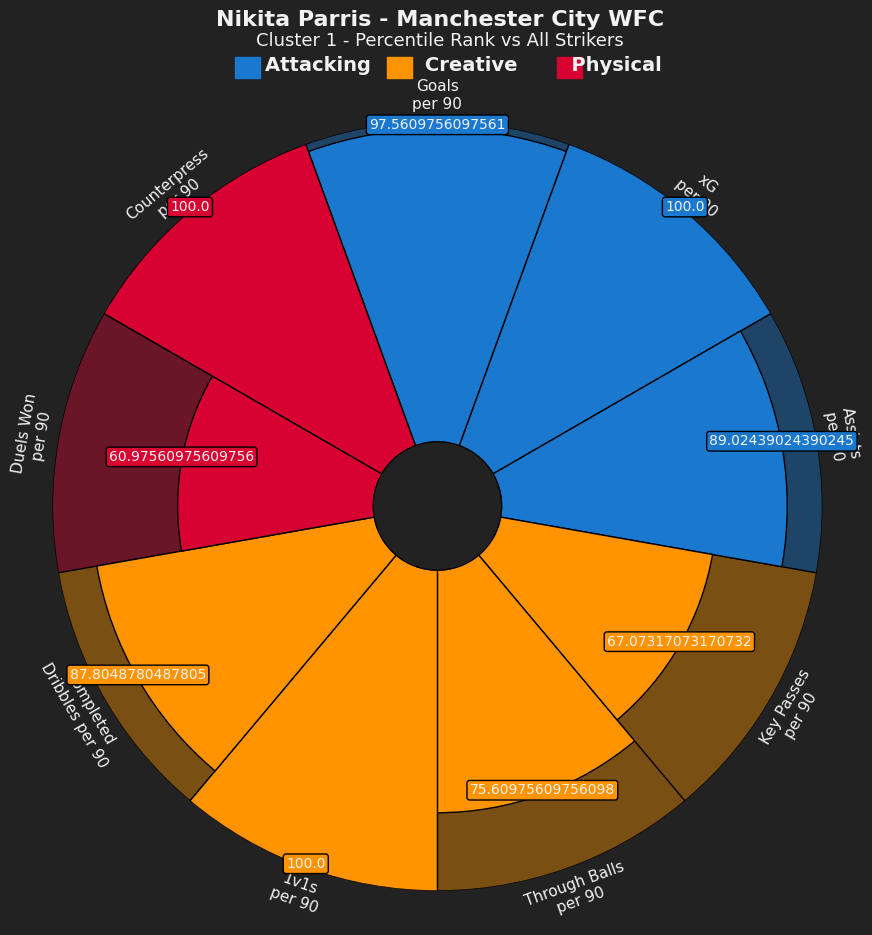

In [62]:
create_individual_pizza_charts(stats_18, cluster_id=1, max_players=3)

In [63]:
def player_pizza(stats_18, player_name):
    """Create pizza chart for a specific player"""
    
    # Parameters for strikers
    params = [
        "Goals\nper 90", "xG\nper 90", "Assists\nper 90", "Key Passes\nper 90",
        "Through Balls\nper 90", "1v1s\nper 90", "Completed\nDribbles per 90",
        "Duels Won\nper 90", "Counterpress\nper 90"
    ]
    
    metric_cols = [
        'goals_per90', 'xG_per90', 'assists_per90', 'key_passes_per90',
        'through_balls_per90', '1vs1_per90', 'completed_dribbles_per90',
        'duels_won_per90', 'counterpress_per90'
    ]
    
    # Calculate percentiles
    for col in metric_cols:
        stats_18[f'{col}_percentile'] = stats_18[col].rank(pct=True) * 100
    
    # Find the specific player
    player_row = stats_18[stats_18['player'] == player_name]
    
    if len(player_row) == 0:
        print(f"Player '{player_name}' not found!")
        print("Available players:")
        print(stats_18['player'].tolist())
        return
    
    player = player_row.iloc[0]
    
    # Get percentile values and round them
    values = [round(player[f'{metric}_percentile'], 0) for metric in metric_cols]
    
    # Color scheme
    slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 4 + ["#D70232"] * 2
    text_colors = ["#F2F2F2"] * 9
    
    # Create pizza chart
    baker = PyPizza(
        params=params,
        background_color="#222222",
        straight_line_color="#000000",
        straight_line_lw=1,
        last_circle_color="#000000",
        last_circle_lw=1,
        other_circle_lw=0,
        inner_circle_size=20
    )
    
    # Plot pizza
    fig, ax = baker.make_pizza(
        values,
        figsize=(10, 10),
        color_blank_space="same",
        slice_colors=slice_colors,
        value_colors=text_colors,
        value_bck_colors=slice_colors,
        blank_alpha=0.4,
        kwargs_slices=dict(edgecolor="#000000", zorder=2, linewidth=1),
        kwargs_params=dict(color="#F2F2F2", fontsize=11, va="center"),
        kwargs_values=dict(
            color="#000000", fontsize=10, zorder=3,
            bbox=dict(edgecolor="#000000", facecolor="white", boxstyle="round,pad=0.2", lw=1)
        )
    )
    
    # Add title
    fig.text(0.515, 0.975, f"{player['player']} - {player['team']}", 
            size=16, ha="center", weight='bold', color="#F2F2F2")
    
    # Add subtitle
    fig.text(0.515, 0.955, f"Cluster {player['cluster']} - Percentile Rank vs All Strikers", 
            size=13, ha="center", color="#F2F2F2")
    
    # Add category labels
    fig.text(0.34, 0.93, "Attacking        Creative        Physical", 
            size=14, weight='bold', color="#F2F2F2")
    
    # Add colored rectangles for legend
    fig.patches.extend([
        plt.Rectangle((0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf", transform=fig.transFigure),
        plt.Rectangle((0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300", transform=fig.transFigure),
        plt.Rectangle((0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232", transform=fig.transFigure)
    ])
    
    plt.show()



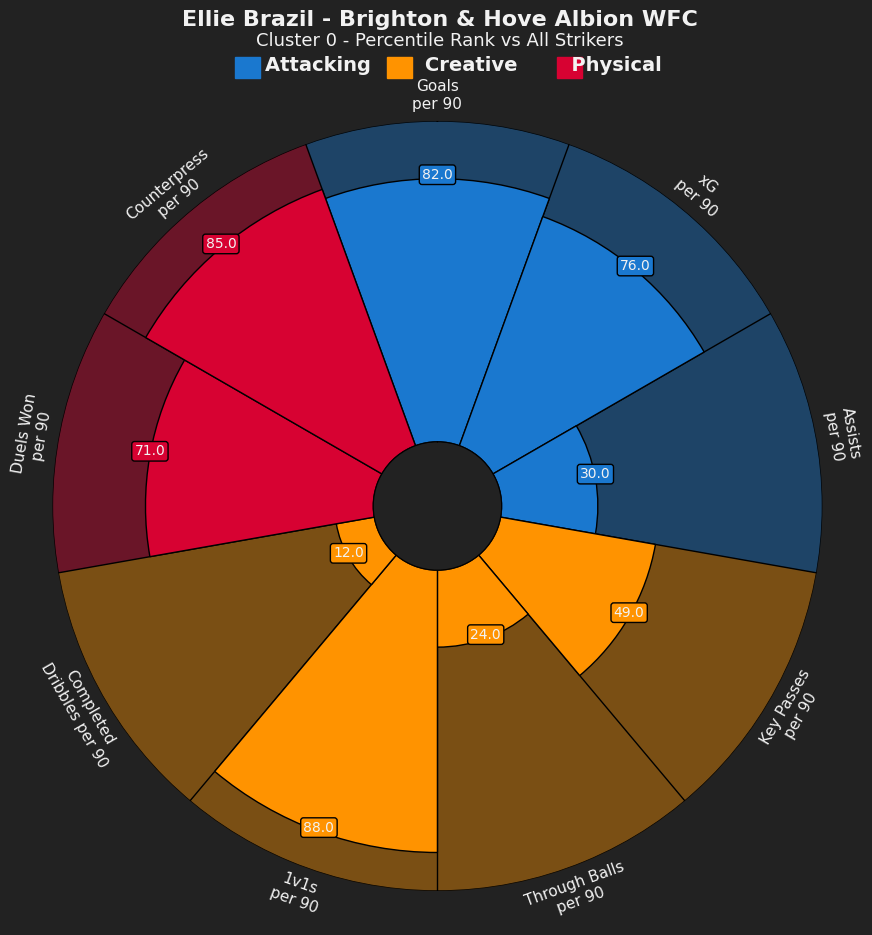

In [64]:
# pizza chart for Ellie Brazil using the player_pizza module

player_pizza(stats_18, "Ellie Brazil")